<a href="https://colab.research.google.com/github/LidaMirzaei/AirSurf-Lettuce/blob/master/Copy_of_NewTopic_in_AI_final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install umap-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap import UMAP
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Load the data
liver_data = pd.read_csv("/content/Liver-counts.csv")
liver_data = liver_data.drop('Unnamed: 0' ,axis=1)

In [5]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(liver_data)

In [6]:
scaled_data

array([[-0.03569092, -0.04990294, -0.03319891, ...,  0.30516689,
        -0.01417359, -0.01375536],
       [-0.03569092, -0.04990294, -0.03319891, ...,  0.15760523,
        -0.01417359, -0.01375536],
       [ 0.01856345, -0.04990294, -0.03319891, ..., -0.01427977,
        -0.01417359, -0.01375536],
       ...,
       [-0.03569092, -0.04990294, -0.03319891, ..., -0.05157558,
        -0.01417359, -0.01375536],
       [-0.03569092, -0.04990294, -0.03319891, ..., -0.02563067,
        -0.01417359, -0.01375536],
       [-0.03569092, -0.04990294, -0.03319891, ..., -0.05157558,
        -0.01417359, -0.01375536]])

In [7]:
# Reduce dimensionality using PCA
pca = PCA(n_components=50)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Reduce dimensionality using K-PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
kpca_result = kpca.fit_transform(scaled_data)

In [8]:
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=0)
X_tsne = tsne.fit_transform(scaled_data)

In [9]:
# Reduce dimensionality using UMAP
umap = UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=0)
X_umap = umap.fit_transform(scaled_data)

In [ ]:
# Reduce dimensionality using Isomap
#isomap = Isomap(n_components=2, n_neighbors=15)
#isomap_result = isomap.fit_transform(scaled_data)

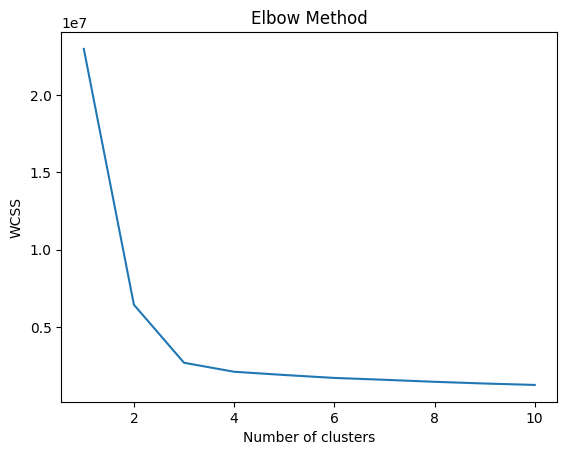

In [ ]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Use the optimal number of clusters to perform k-means clustering
n_clusters = 4  # replace with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)
labels = kmeans.predict(scaled_data)

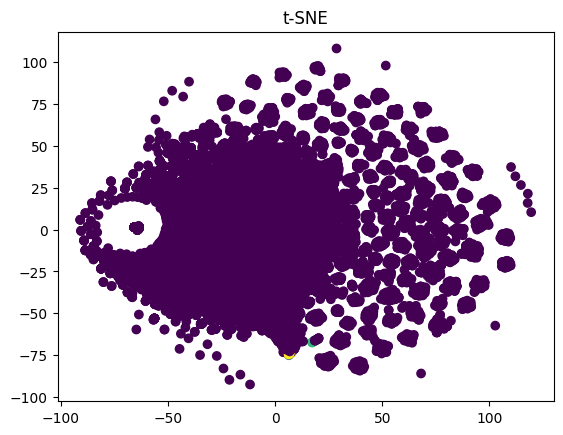

In [ ]:
# Plot the original data in 2D space
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.title('t-SNE')
plt.show()


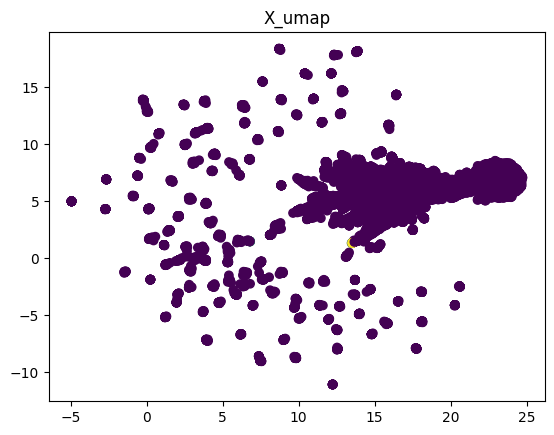

In [ ]:
# Plot the original data in 2D space
plt.scatter(X_umap[:,0], X_umap[:,1], c=labels)
plt.title('X_umap')
plt.show()


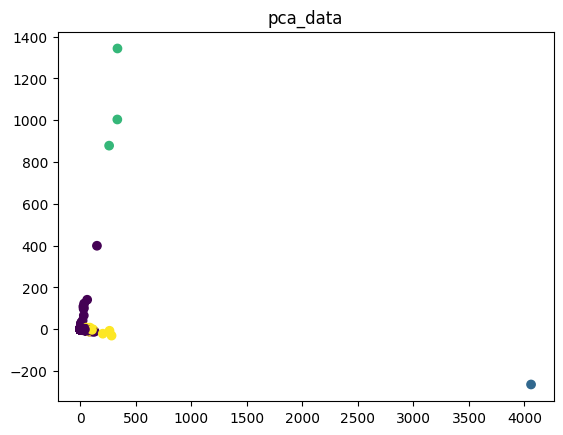

In [ ]:
# Plot the original data in 2D space
plt.scatter(pca_data[:,0], pca_data[:,1], c=labels)
plt.title('pca_data')
plt.show()

In [ ]:
# Plot the original data in 2D space
plt.scatter(kpca_result[:,0], kpca_result[:,1], c=labels)
plt.title('KPCA')
plt.show()

NameError: ignored

In [ ]:
# Plot the original data in 2D space
plt.scatter(isomap_result[:,0], isomap_result[:,1], c=labels)
plt.title('Isomap')
plt.show()

NameError: ignored